## Group Assignment Part 1 

The `review.csv` dataset contains 10000 real reviews for real businesses in the US:
 - business_id: unique identifer for each business
 - date: date a review is made
 - review_id: unique identifier for each review
 - stars: star ratings of a business, ranging from 1 to 5
 - text: review comments
 - user_id: unique identifer for each reviewer
 - cool: how many people find this review cool
 - useful: how many people find this review useful 
 - funny: how many people find this review funny

### Task 1: Import the dataset and explore the following features of the dataset

 - 1.1 Shape of the dataset; descriptive statistics of all numeric columns; and check if there are any missing values in the dataset
 - 1.2 Find out the distribution of star ratings (how many 1s, 2s, 3s, 4s, and 5s)
 - 1.3 How many unique businesses were reviewed
 - 1.4 List top 10 businesses with best average ratings (show business ids with ratings) 
 - 1.5 List top 10 businesses with best average ratings, but only those businesses with more than 10 reviews (show business ids with ratings)
 - 1.6 List top 10 reviewers whose reviews got the most total number of useful ratings (show reviewer IDs with total number of useful ratings)
 - 1.7 Plot a bar chart for star rating counts (ordered 1 through 5)
 - 1.8 Plot and see the relationship between review text's lengths and cool/useful/funny respectively (three plots) [Hint: you will need to create a new column for review text's length]
 - 1.9 Any other useful/interesting statistics & plots you may get or draw from the data 

In [1]:
# Import libraries and read dataset in. 
import pandas as pd
review = pd.read_csv("review.csv")

In [2]:
# 1.shape of the dataset; descriptive statistics of all numeric columns; and check if there is any missing values in the dataset
review.shape

(10000, 10)

In [3]:
review.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [4]:
review.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [5]:
# 2.the distribution of star ratings (how many 1s, 2s, 3s, 4s, and 5s)
review.groupby('stars').stars.count()

stars
1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [6]:
# 3. how many businesses were reviewed
len(review.groupby('business_id').business_id.count())

4174

In [7]:
# 4. list top 10 buinesses with best average ratings (show business ids with ratings)
review.groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
zyYRWnimLbQt9aCCI_2MZw    5.0
o2rrTbAxGXrdQKQvKDcGiA    5.0
oHjoahzL5F0m-OGDQouEGw    5.0
PgcuQvFl76bx42xIFyhzVg    5.0
oGYPsU7IJPhyVpd0F5lfTg    5.0
PqJwKYHU_eHjw0q0NlULJw    5.0
PrYz1XEnvGJ-5Q0VVPCLnQ    5.0
oBVS96DtPGk9GU8zPx5Hjg    5.0
PwtYeGu-19v9bU4nbP9UbA    5.0
Q-dsvMlhEr9TgvX8FxW4uQ    5.0
Name: stars, dtype: float64

In [8]:
# 5. list top 10 business with best average ratings, but only those with more than 10 reviews (show business ids with ratings)
review.groupby('business_id').filter(lambda x : x['review_id'].count() > 10).groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
KBG28p3lGX17hOPoHhq5PQ    4.818182
z3yFuLVrmH-3RJruPEMYKw    4.769231
Bc4DoKgrKCtCuN-0O5He3A    4.750000
6oRAC4uyJCsJl1X0WZpVSA    4.583333
7SO_rX1F6rQEl-5s3wZxgQ    4.571429
zp713qNhx8d9KCJJnrw1xA    4.545455
I4bSn5gXsHuSPu7L-d_8nQ    4.545455
IuAPYzf3NSyfyXYgT46YVA    4.545455
hfl62LX14YqNpG0g0Tj6_Q    4.533333
L9UYbtAUOcfTgZFimehlXw    4.526316
Name: stars, dtype: float64

In [9]:
# 6. list top 10 reviewers whose reviews got the most total number of useful ratings 
#    (show user IDs with total number of useful ratings)
review.groupby('user_id').useful.sum().sort_values(ascending=False).head(10)


user_id
fczQCSmaWF78toLEmb0Zsw    293
C8ZTiwa7qWoPSMIivTeSfw    143
P2kVk4cIWyK4e4h14RhK-Q    132
4ozupHULqGyO42s3zNUzOQ    130
0bNXP9quoJEgyVZu9ipGgQ    115
sEWeeq41k4ohBz4jS_iGRw    103
wHg1YkCzdZq9WBJOTRgxHQ    100
kGgAARL2UmvCcTRfiscjug     82
73eZuIuXVD5sif7GrIMfuQ     76
C6IOtaaYdLIT5fWd7ZYIuA     74
Name: useful, dtype: int64

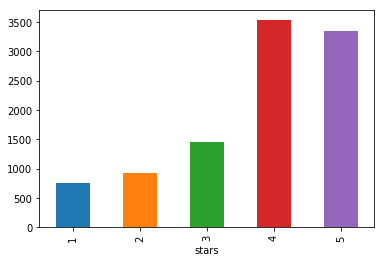

In [10]:
# 7. Plot a bar chart for star rating counts (ordered 1 through 5)
%matplotlib inline
from matplotlib import pyplot as plt

review.groupby('stars').stars.count().plot(kind='bar')


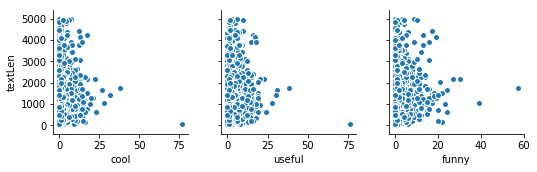

In [11]:
# 8. plot and see the relationship between review text's lengths and cool/useful/funny respectively (three plots)
import seaborn as sns
review['textLen'] = review['text'].apply(lambda x : len(x))
sns.pairplot(review, x_vars = ['cool', 'useful', 'funny'], y_vars=['textLen'])

### Task 2: Use text mining to predict star ratings from review text

Your main goal in this task is to find out the relationship between the review texts and the star ratings, as you are interested in knowing what makes people give good versus bad ratings of a business. 

** For easier comparison, please keep <font color='red'> default percentage of test data, and random_state=1 </font> for all train/test splits!**

 - 2.1. Train/test split data (using the default train/test percentage), and then predict. Report prediction accuracy and confusion matrix. <font color='red'> Briefly discuss your findings in a word document </font> (e.g., what do you think about the accuracy score; what can you observe from the confusion matrix?).
 - 2.2. Repeat step 1, but only with reviews that give start ratings 1 or 5.  <font color='red'> Briefly discuss your findings in the word document </font> (e.g., how is the prediction accuracy as compared to that of step 1 and why; any insights from examining false positives and false negative reviews?) 
 - 2.3. Based on the result of step 2, find the top 10 token words in the training data that are most predictive of 5-star reviews; and top 10 token words that are most predictive for 1-star reviews.  <font color='red'> Briefly discuss </font> any insights you can get from examining these token words <font color='red'> in the word document </font>. 

In [12]:
#### All Required Import Libs for later
import nltk
nltk.download('stopwords')
import numpy as np

#from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

import seaborn as sns
import itertools
from IPython.display import display


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Billp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
# function to print confusion matrix and prediction accuracy for easier visualisation
def predictionReport(y_test, y_pred, classes):
    report_data = []
    lines = metrics.classification_report(y_test,y_pred).split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    print(metrics.classification_report(y_test,y_pred))
    print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred))  
    plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred), classes=classes, title='Confusion matrix, without normalization')

### Task 2.1 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vect = CountVectorizer()
nb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)
X_train_t = vect.fit_transform(X_train).toarray()
X_test_t = vect.transform(X_test).toarray()

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Predication Accuracy: 0.4712000000


array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]], dtype=int64)

             precision    recall  f1-score   support

          1       0.54      0.30      0.38       185
          2       0.39      0.07      0.12       234
          3       0.29      0.10      0.14       365
          4       0.43      0.71      0.53       884
          5       0.58      0.53      0.55       832

avg / total       0.46      0.47      0.43      2500

Predication Accuracy: 0.4712000000


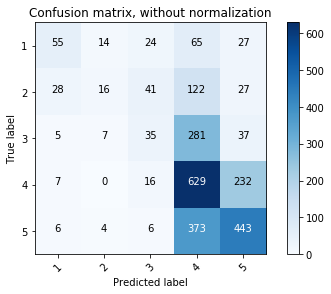

In [16]:
predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

In [17]:
print(y_train.value_counts())
y_test.value_counts()

4    2642
5    2505
3    1096
2     693
1     564
Name: stars, dtype: int64


4    884
5    832
3    365
2    234
1    185
Name: stars, dtype: int64

### Task 2.2

In [18]:
review[(review.stars== 1) | (review.stars==5)]['text'], review[(review.stars==1) | (review.stars==5)]['stars']

(0       My wife took me here on my birthday for breakf...
 1       I have no idea why some people give bad review...
 3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
 4       General Manager Scott Petello is a good egg!!!...
 6       Drop what you're doing and drive here. After I...
 9       Nobuo shows his unique talents with everything...
 10      The oldish man who owns the store is as sweet ...
 11      Wonderful Vietnamese sandwich shoppe. Their ba...
 12      They have a limited time thing going on right ...
 17      okay this is the best place EVER! i grew up sh...
 21      This place shouldn't even be reviewed - becaus...
 22      first time my friend and I went there... it wa...
 23      U can go there n check the car out. If u wanna...
 24      I love this place! I have been coming here for...
 26      I love love LOVE this place. My boss (who is i...
 30      Disclaimer: Like many of you, I am a sucker fo...
 31      Disgusting!  Had a Groupon so my daughter and .

In [19]:
vect = CountVectorizer()
nb = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(review[(review.stars== 1) | (review.stars==5)]['text'], review[(review.stars==1) | (review.stars==5)]['stars'], random_state=1)
X_train_t = vect.fit_transform(X_train).toarray()
X_test_t = vect.transform(X_test).toarray()

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred_class))
metrics.confusion_matrix(y_test, y_pred_class)

Predication Accuracy: 0.9187866928


array([[126,  58],
       [ 25, 813]], dtype=int64)

             precision    recall  f1-score   support

          1       0.83      0.68      0.75       184
          5       0.93      0.97      0.95       838

avg / total       0.92      0.92      0.92      1022

Predication Accuracy: 0.9187866928


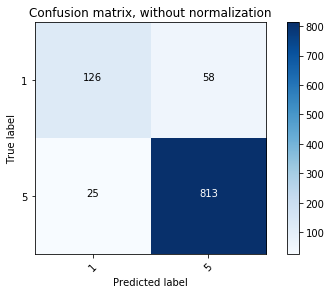

In [20]:
predictionReport(y_test, y_pred_class, ['1', '5'])

In [21]:
print(y_train.value_counts())
y_test.value_counts()

5    2499
1     565
Name: stars, dtype: int64


5    838
1    184
Name: stars, dtype: int64

In [22]:
print(X_test[(y_test == 1) & (y_pred_class==5)].shape)
X_test[(y_test == 1) & (y_pred_class==5)].head(15)


(58,)


2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
Name: text, dtype: object

In [23]:
print(X_test[(y_test == 5) & (y_pred_class==1)].shape)
X_test[(y_test == 5) & (y_pred_class==1)]

(25,)


7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

### Task 2.3

In [24]:
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

16825

In [25]:
print(nb.feature_count_.shape)
nb.class_count_

(2, 16825)


array([ 565., 2499.])

In [26]:
five_token_count = nb.feature_count_[1, :]
five_token_count

array([39.,  5.,  0., ...,  1.,  1.,  1.])

In [27]:
one_token_count = nb.feature_count_[0, :]
one_token_count

array([26.,  4.,  1., ...,  0.,  0.,  0.])

In [28]:
pd.options.display.float_format = '{:,.0f}'.format
tokens = pd.DataFrame({'Five_Star':five_token_count, 'One_Star':one_token_count}, index=X_train_tokens)
tokens.sort_values('Five_Star', ascending = False).head(10)

,Five_Star,One_Star
the,"14,008","4,175"
and,"10,429","2,659"
to,"6,333","2,409"
of,"4,557","1,294"
is,"4,390",770
it,"4,259","1,328"
was,"3,534","1,484"
in,"3,486",941
for,"3,315",970
you,"2,902",637


In [29]:
tokens.sort_values('One_Star', ascending = False).head(10)

,Five_Star,One_Star
the,"14,008","4,175"
and,"10,429","2,659"
to,"6,333","2,409"
was,"3,534","1,484"
it,"4,259","1,328"
of,"4,557","1,294"
for,"3,315",970
that,"2,591",958
in,"3,486",941
my,"2,689",841


In [30]:
tokens['Five_Star'] = tokens['Five_Star'] + 1
tokens['One_Star'] = tokens['One_Star'] + 1

In [31]:
# showing new count for some token words
tokens.loc[(tokens.index == 'the')|(tokens.index == 'and')|(tokens.index == 'to'),:]

,Five_Star,One_Star
and,"10,430","2,660"
the,"14,009","4,176"
to,"6,334","2,410"


In [32]:
nb.class_count_

array([ 565., 2499.])

In [33]:
y_train.value_counts()

5    2499
1     565
Name: stars, dtype: int64

In [34]:
tokens['Five_Star_freq'] = tokens.Five_Star/nb.class_count_[1]
tokens['One_Star_freq'] = tokens.One_Star/nb.class_count_[0]

In [35]:
tokens['Five_ratio'] = tokens.Five_Star_freq/tokens.One_Star_freq

In [36]:
tokens['One_ratio'] = tokens.One_Star_freq/tokens.Five_Star_freq

In [37]:
tokens.sort_values('Five_ratio', ascending=False).head(10)

,Five_Star,One_Star,Five_Star_freq,One_Star_freq,Five_ratio,One_ratio
fantastic,193,2,0,0,22,0
perfect,245,3,0,0,18,0
yum,62,1,0,0,14,0
favorite,345,7,0,0,11,0
outstanding,49,1,0,0,11,0
brunch,42,1,0,0,9,0
gem,40,1,0,0,9,0
mozzarella,39,1,0,0,9,0
pasty,39,1,0,0,9,0
amazing,463,12,0,0,9,0


In [38]:
tokens.sort_values('One_ratio', ascending=False).head(10)

,Five_Star,One_Star,Five_Star_freq,One_Star_freq,Five_ratio,One_ratio
staffperson,1,17,0,0,0,75
refused,1,14,0,0,0,62
disgusting,2,24,0,0,0,53
filthy,1,11,0,0,0,49
unacceptable,1,9,0,0,0,40
acknowledge,1,9,0,0,0,40
unprofessional,1,9,0,0,0,40
ugh,2,17,0,0,0,38
yuck,2,16,0,0,0,35
fuse,1,8,0,0,0,35


### Task 3.1

For prediction Star 1/5
- 3.1.1 kneighborsclassifier 
- 3.1.2 RandomForestClassifier 
- 3.1.3 Log Support Vector Machines
- 3.1.4 Linear Support Vector Machines
- 3.1.5 Logistic Regression
- 3.1.6 best accuracy with Logistic Regression and only including reviews longer than 20 words + only words longer than 3 letters

In [39]:
###3.1.1 try kneighborsclassifier (k=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
X_train, X_test, y_train, y_test = train_test_split(review[(review.stars== 1)| (review.stars==5)]['text'], review[(review.stars==1)| (review.stars==5)]['stars'], random_state=1)
X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)
knn.fit(X_train_t, y_train)
y_pred_class = knn.predict(X_test_t)

print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred_class))


Predication Accuracy: 0.8395303327


In [40]:
#Try what value of k should be used
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_t, y_train)
    y_pred_class = knn.predict(X_test_t)
    scores.append(metrics.accuracy_score(y_test, y_pred_class))

Text(0,0.5,'Testing Accuracy')

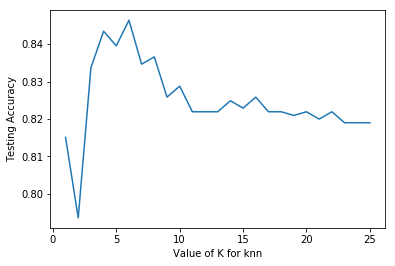

In [41]:
# allow plots to appears inside notebook
%matplotlib inline

# plot the relationship between k and scores (the testing accuracy)
plt.plot(k_range, scores)
plt.xlabel('Value of K for knn')
plt.ylabel('Testing Accuracy')

             precision    recall  f1-score   support

          1       0.80      0.20      0.31       184
          5       0.85      0.99      0.91       838

avg / total       0.84      0.85      0.81      1022

Predication Accuracy: 0.8463796477


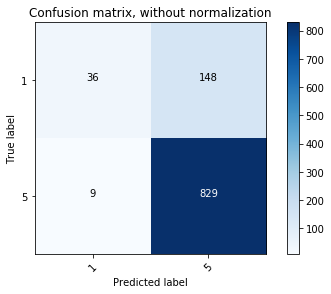

In [42]:
#try kneighborsclassifier (k=6), fail to improve accuracy
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
X_train, X_test, y_train, y_test = train_test_split(review[(review.stars== 1)| (review.stars==5)]['text'], review[(review.stars==1)| (review.stars==5)]['stars'], random_state=1)
X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)
knn.fit(X_train_t, y_train)
y_pred_class = knn.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '5'])

In [43]:
###3.1.2 Try RandomForestClassifier, but accuracy is lowered.
classifier = RandomForestClassifier(n_estimators=10, random_state=1)  
classifier.fit(X_train_t, y_train)  
y_pred_class_RFC = classifier.predict(X_test_t)

print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred_class_RFC))


Predication Accuracy: 0.8669275930


In [44]:
#Try which value of n should be used
n_range = range(1,30,1)
scores = []
for n in n_range:
    RFC = RandomForestClassifier(n_estimators=n, random_state=1)
    RFC.fit(X_train_t, y_train)
    y_pred_class_RFC = RFC.predict(X_test_t)
    scores.append(metrics.accuracy_score(y_test, y_pred_class_RFC))

Text(0,0.5,'Testing Accuracy')

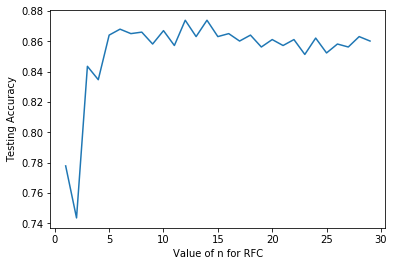

In [45]:
import matplotlib.pyplot as plt
# allow plots to appears inside notebook
%matplotlib inline

# plot the relationship between k and scores (the testing accuracy)
plt.plot(n_range, scores)
plt.xlabel('Value of n for RFC')
plt.ylabel('Testing Accuracy')

Predication Accuracy: 0.8737769080
             precision    recall  f1-score   support

          1       0.87      0.35      0.50       184
          5       0.87      0.99      0.93       838

avg / total       0.87      0.87      0.85      1022

Predication Accuracy: 0.8737769080


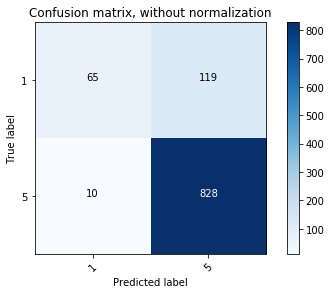

In [46]:
###3.1.2 Try RandomForestClassifier again with (n_estimator=14)
classifier = RandomForestClassifier(n_estimators=14, random_state=1)  
classifier.fit(X_train_t, y_train)  
y_pred_class_RFC = classifier.predict(X_test_t)

print("Predication Accuracy: %.10f"%metrics.accuracy_score(y_test, y_pred_class_RFC))
predictionReport(y_test, y_pred_class_RFC, ['1', '5'])

             precision    recall  f1-score   support

          1       0.85      0.71      0.77       184
          5       0.94      0.97      0.95       838

avg / total       0.92      0.92      0.92      1022

Predication Accuracy: 0.9246575342


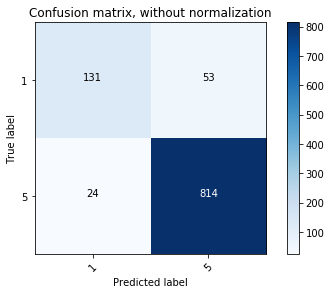

In [47]:
###3.1.3 Try Log Support Vector Machines, accuracy is raised to 92.75%

svm = SGDClassifier(loss='log', max_iter=100000, tol=1e-3)  #Log returns a Logrithmic SVM

svm.fit(X_train_t, y_train)
y_pred_class_SVGOri = svm.predict(X_test_t)

predictionReport(y_test, y_pred_class_SVGOri, ['1', '5'])

             precision    recall  f1-score   support

          1       0.77      0.80      0.79       184
          5       0.96      0.95      0.95       838

avg / total       0.92      0.92      0.92      1022

Predication Accuracy: 0.9227005871


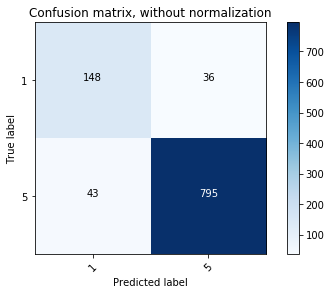

In [48]:
###3.1.4 Try Linear Support Vector Machines, accuracy is increased to 92.27%
svc = LinearSVC()

svc.fit(X_train_t, y_train)
y_pred_class_SVCOri = svc.predict(X_test_t)

predictionReport(y_test, y_pred_class_SVCOri, ['1', '5'])

             precision    recall  f1-score   support

          1       0.81      0.76      0.79       184
          5       0.95      0.96      0.95       838

avg / total       0.92      0.93      0.92      1022

Predication Accuracy: 0.9256360078


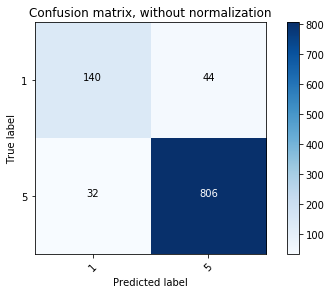

In [50]:
###3.1.5 Try Logistic Regression, accuracy is increased to 92.56% 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_t, y_train)
y_pred_class_LR = logreg.predict(X_test_t)

predictionReport(y_test, y_pred_class_LR, ['1', '5'])

             precision    recall  f1-score   support

          1       0.94      0.75      0.84       179
          5       0.95      0.99      0.97       834

avg / total       0.95      0.95      0.95      1013

Predication Accuracy: 0.9486673248


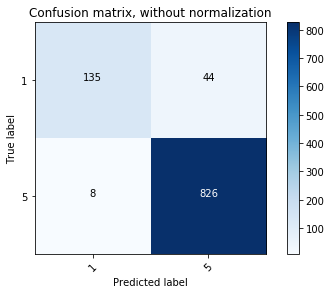

In [51]:
###3.1.6 best accuracy at 94.86% with Logistic Regression and only including reviews longer than 20 words + only words longer than 2 letters
review = pd.read_csv("review.csv")
review=review[review['text'].map(len) > 20]
review.text = review.text.apply(lambda x: ' '.join([word for word in str(x).split(' ') if len(word) >= 3]))
vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(review[(review.stars == 1) | (review.stars==5)]['text'], review[(review.stars==1) | (review.stars==5)]['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_t, y_train)
y_pred_class = logreg.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '5'])

### Task 3.2

Our method and ideas for prediction stars 1-5:
- 3.2.1 only including reviews longer than 10 words
- 3.2.2 only including token words longer than 3 letters
- 3.2.3 combining above only including: 
    - reviews longer than 10 words
    - token words longer than 3 letters
- 3.2.4 using count vectoriser with filter max_features=1700, min_df=2, max_df=0.9
- 3.2.5 combine above including 
    - reviews longer than 10 words
    - token words longer than 3 letters
    - count vectoriser with filter max_features=1700, min_df=2, max_df=0.9
- 3.2.6 removing stop words
- 3.2.7 filter out reviews if user only gave one review
- 3.2.8 trying logistic regression and Term Frequency-InversDocument Frequency, with count vectoriser 
    - count vectoriser with filter max_features=1700, min_df=2, max_df=0.9

             precision    recall  f1-score   support

          1       0.69      0.36      0.47       182
          2       0.47      0.08      0.14       245
          3       0.29      0.12      0.17       356
          4       0.44      0.73      0.55       870
          5       0.61      0.57      0.59       844

avg / total       0.50      0.49      0.46      2497

Predication Accuracy: 0.4949939928


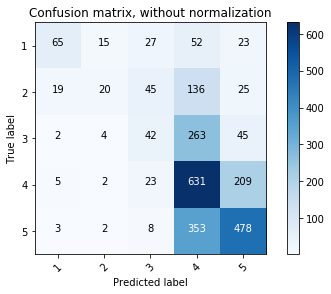

In [52]:
###3.2.1 only including reviews longer than 10 words, accuracy is improved to 47.49%.
review = pd.read_csv("review.csv")
review=review[review['text'].map(len) > 10]
vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       0.61      0.31      0.41       185
          2       0.37      0.07      0.12       234
          3       0.30      0.10      0.15       365
          4       0.43      0.71      0.53       884
          5       0.59      0.53      0.56       832

avg / total       0.47      0.47      0.44      2500

Predication Accuracy: 0.4740000000


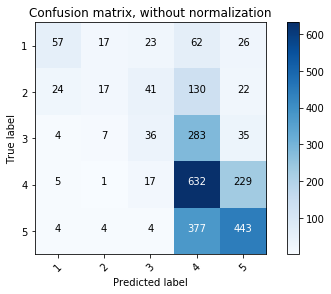

In [53]:
###3.2.2 only including token words longer than 3 letters, accuracy is raised to 47.40%
review = pd.read_csv("review.csv")
review.text = review.text.apply(lambda x: ' '.join([word for word in str(x).split(' ') if len(word) >= 3]))
vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       0.67      0.28      0.40       205
          2       0.38      0.09      0.14       243
          3       0.27      0.10      0.14       355
          4       0.44      0.72      0.55       858
          5       0.63      0.60      0.61       836

avg / total       0.49      0.50      0.46      2497

Predication Accuracy: 0.4965959151


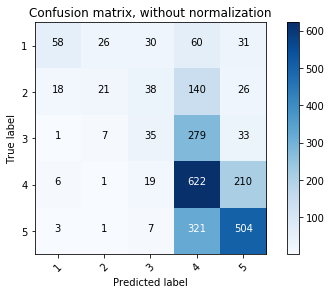

In [54]:
###3.2.3 combining above only including:reviews longer than 10 words & token words longer than 3 letters, accuracy is raised to 49.65%
review=review[review['text'].map(len) > 10]
review.text = review.text.apply(lambda x: ' '.join([word for word in str(x).split(' ') if len(word) >= 3]))
vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       0.39      0.52      0.44       185
          2       0.36      0.27      0.31       234
          3       0.39      0.38      0.38       365
          4       0.53      0.53      0.53       884
          5       0.61      0.61      0.61       832

avg / total       0.51      0.51      0.51      2500

Predication Accuracy: 0.5104000000


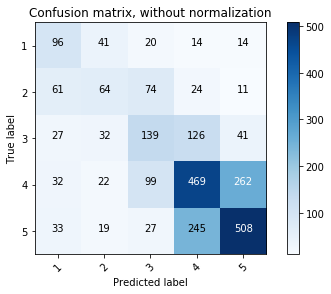

In [55]:
###3.2.4 using count vectoriser with filter max_features=1700, min_df=2, max_df=0.9, accuracy is raised to 51.04%
review = pd.read_csv("review.csv")
vect = CountVectorizer(max_features=1700, min_df=2, max_df=0.9)
X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)
X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)
nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       0.42      0.56      0.48       182
          2       0.41      0.30      0.35       245
          3       0.40      0.38      0.39       356
          4       0.54      0.53      0.53       870
          5       0.63      0.65      0.64       844

avg / total       0.53      0.53      0.53      2497

Predication Accuracy: 0.5290348418


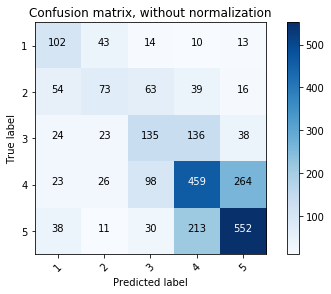

In [56]:
###3.2.5 Accuracy is raised to 52.9% by combining above including reviews longer than 10 words + token words longer than 3 letters + count vectoriser with filter max_features=1700, min_df=2, max_df=0.9
review = pd.read_csv("review.csv")
review=review[review['text'].map(len) > 10]
review.text = review.text.apply(lambda x: ' '.join([word for word in str(x).split(' ') if len(word) >= 3]))
vect = CountVectorizer(max_features=1700, min_df=2, max_df=0.9)
X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)
nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       0.60      0.31      0.41       185
          2       0.35      0.07      0.12       234
          3       0.30      0.10      0.15       365
          4       0.43      0.72      0.53       884
          5       0.58      0.51      0.54       832

avg / total       0.46      0.47      0.43      2500

Predication Accuracy: 0.4692000000


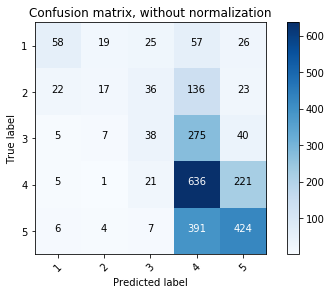

In [57]:
###3.2.6 Trying to removing stop words but accuracy to lowered
review = pd.read_csv("review.csv")
vect = CountVectorizer(stop_words=stopwords.words('english'))

X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)

nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

             precision    recall  f1-score   support

          1       1.00      0.03      0.06        68
          2       0.18      0.02      0.03       123
          3       0.31      0.09      0.14       240
          4       0.41      0.80      0.54       491
          5       0.50      0.34      0.40       361

avg / total       0.43      0.42      0.35      1283

Predication Accuracy: 0.4216679657


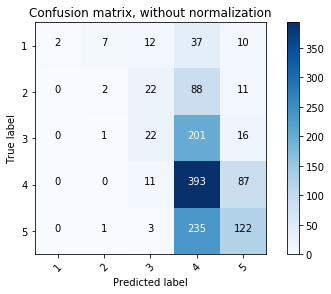

In [58]:
###3.2.7 filter out reviews if user only gave one review, but not sucessful to raise accuracy
review = pd.read_csv("review.csv")
review = review.groupby('user_id').filter(lambda x: len(x) > 1)
vect = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)


nb.fit(X_train_t, y_train)
y_pred_class = nb.predict(X_test_t)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])

In [59]:
#Only half of the results are left
review.shape

(5131, 10)

             precision    recall  f1-score   support

          1       0.60      0.42      0.50       185
          2       0.51      0.18      0.27       234
          3       0.44      0.23      0.30       365
          4       0.50      0.64      0.56       884
          5       0.59      0.68      0.63       832

avg / total       0.53      0.53      0.51      2500

Predication Accuracy: 0.5344000000


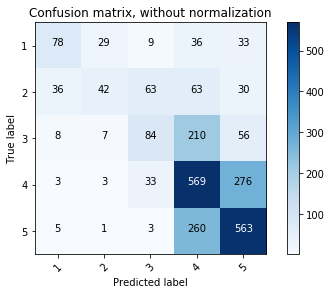

In [60]:
###3.2.8 trying logistic regression and Term Frequency-InversDocument Frequency, with count vectoriser, accuracy is raised to 53.44%
review = pd.read_csv("review.csv")
vect = CountVectorizer(max_features=1700, min_df=2, max_df=0.9)
X_train, X_test, y_train, y_test = train_test_split(review['text'], review['stars'], random_state=1)

X_train_t = vect.fit_transform(X_train)
X_test_t = vect.transform(X_test)
tfidf_transform = TfidfTransformer()  #Remove Common&Freq words but irrelevant to the meaning words. (Term Frequency-InversDocument Frequency)
X_train_tfidf = tfidf_transform.fit_transform(X_train_t)
X_test_tfidf = tfidf_transform.fit_transform(X_test_t)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred_class = logreg.predict(X_test_tfidf)

predictionReport(y_test, y_pred_class, ['1', '2', '3', '4', '5'])
